# Resistive Switch : Test

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy import stats

In [2]:
# Make the plots a bit bigger to see
# NOTE: Must be done in a separate cell
plt.rcParams['figure.dpi'] = 100

In [3]:
## Python Data from system
## Python Data from ccr runs 
# path = "Data/ttest6/"
path = "Data_ccr/par_set_1/vtest1/"
Alldata = np.loadtxt(path + "delta_f2py_test.dat")
print(np.shape(Alldata))
nn = np.size(Alldata,0)
A1 = Alldata[0:nn//2,:]
A2 = np.loadtxt("Data_ccr/par_set_1/vtest1/delta_up.dat")
A2 = A2[0:nn,:]
# A1 = Alldata[0:nn,:]
nn = np.size(A1,0)
print(np.shape(A1), np.shape(A2))


(160, 11)
(80, 11) (80, 9)


In [21]:
## Python Data from system
## Python Data from ccr runs 
# path = "Data/ttest6/"
path = "Data_ccr/par_set_1/vtest3/"
Alldata = np.loadtxt(path + "delta_f2py_test.dat")
print(np.shape(Alldata))
nn2 = np.size(Alldata,0)
A3 = Alldata[0:nn2//2,:]
# A2 = np.loadtxt("Data_ccr/par_set_1/vtest1/delta_up.dat")
# A2 = A2[0:nn,:]
# A1 = Alldata[0:nn,:]
nn2 = np.size(A3,0)
print(np.shape(A3), np.shape(A2))



(160, 11)
(80, 11) (80, 9)


In [4]:
## Python Data Single run
# A1 = np.loadtxt("Data/run5/delta_f2py_test.dat")
# nn = np.size(A1,0)
# print(np.shape(A1))

In [5]:
inputs = open(path+"input_par.dat", "r")

print(inputs.read())
print(type(inputs))

{'g6': 0.5, 'g4': -1.0, 'g2': 1.0, 'coef': 0.1, 'nskip': 16, 'tloop': False, 'dphi': 0.2, 'Tc': 1.0, 'mfphi': False, 'r0': 3.5, 'Rload': 1.0, 'nwarm': 200000, 'my': 64, 'mx': 64, 'gamma': 0.1}{'Tbath': 0.85, 'seed': 445921, 'maxE': 16.2, 'nmeas': 2048, 'dTb': 0.01, 'dE': 0.2, 'minT': 0.01, 'Tcrit': 1.313, 'maxT': 1.51, 'minE': 0.2}
<class '_io.TextIOWrapper'>


In [6]:
## Fortran Data
# Bdata = np.loadtxt("ifor_delta.dat")
# Bdata = np.loadtxt("Data/Test4/for_delta_test.dat")
# print(np.shape(Bdata))
# nn = np.size(Bdata,0)
# B1 = Bdata[0:int(nn/2),:]
# B2 = Bdata[int(nn/2)+1:nn,:]
# print(np.shape(B1))

In [23]:
#### Python Data Voltage Up
Vt_up1 = A1[:,0]
Es_up1 = A1[:,9]
Js_up1 = A1[:,10]/64.0
R_up1 = A1[:,7]
#### Python Data 
Vt_up3 = A3[:,0]
Es_up3 = A3[:,9]
Js_up3 = A3[:,10]/64.0
R_up3 = A3[:,7]

#### Fortran Data Votage Up
Vt_up2 = A2[:,1]
Es_up2 = A2[:,2]
Js_up2 = A2[:,3]
R_up2 = A2[:,6]

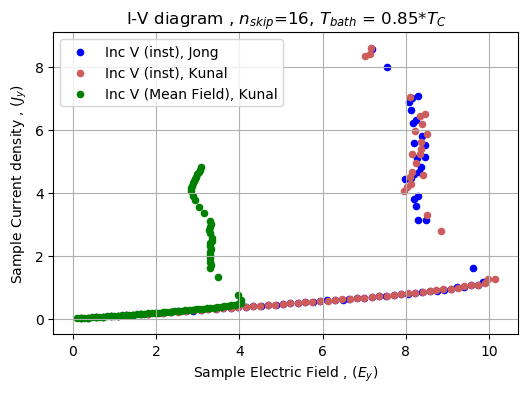

In [27]:
plt.scatter(Es_up2, Js_up2, s = 20.0, c = 'Blue', label="Inc V (inst), Jong")
# plt.scatter(Vs_dn_f, I_dn_f, s = 20.0, c = 'Magenta', label="Dec V, Ft")
# plt.scatter(Vs_up, I_up, s = 20.0, c = 'IndianRed', label=r'$T_{bath}$ = 0.85*$T_C$')
plt.scatter(Es_up1, Js_up1, s =20.0, c = 'IndianRed', label='Inc V (inst), Kunal')
plt.scatter(Es_up3, Js_up3, s = 20.0, c = 'Green', label="Inc V (Mean Field), Kunal")


# plt.plot(Data_Set[:,0],Data_Set[:,1])
plt.legend()
plt.title('I-V diagram , $n_{skip}$=16, $T_{bath}$ = 0.85*$T_C$')
plt.xlabel('Sample Electric Field , ($E_y$)')
plt.ylabel('Sample Current density , ($J_y$)')
# plt.xlim(20.0,22.)
plt.grid(b=True,which='major', axis='both')
plt.savefig(path + "I-Vmf.pdf")

plt.show()

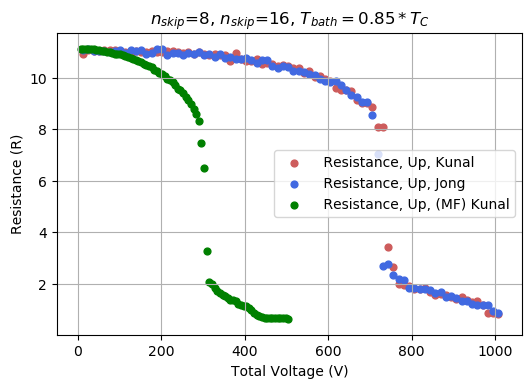

In [26]:
plt.scatter(Vt_up1,R_up1, s=24.0,c="IndianRed",label=" Resistance, Up, Kunal")
plt.scatter(Vt_up2,R_up2, s=24.0,c="RoyalBlue",label=" Resistance, Up, Jong")
plt.scatter(Vt_up3,R_up3, s=24.0,c="Green",label=" Resistance, Up, (MF) Kunal")
# plt.scatter(E_dn_py,R_dn_py ,c = "RoyalBlue", s=12.0,label="ForPython, Down")
# plt.scatter(V_dn_f,R_dn_f,s=12.0,c = "green",marker='x',label="Fortran, Down")
# plt.scatter(E_up_py,np.abs(delta_up_py), c="IndianRed", label="ForPython, Up")
# plt.scatter(E_dn_py,np.abs(delta_dn_py) ,c = "RoyalBlue" , label="ForPython, Down")

plt.xlabel('Total Voltage (V)')
plt.ylabel('Resistance (R)')
# plt.xlim(20.,25.0)
plt.title('$n_{skip}$=8, $n_{skip}$=16, $T_{bath} = 0.85*T_C$')
plt.grid(b=True,which='major', axis='both')
plt.legend()

plt.savefig(path + "Resitance_v_voltagemf.pdf")
plt.show()

In [10]:
# plt.scatter(E_up,delta_up, s=24.0,c="IndianRed",label=" Resistance, Up, Kunal")
# # plt.scatter(E_up,R2_dn, s=24.0,c="RoyalBlue",label=" Resistance, Up, Ishiaka")
# # plt.scatter(E_dn_py,R_dn_py ,c = "RoyalBlue", s=12.0,label="ForPython, Down")
# # plt.scatter(V_dn_f,R_dn_f,s=12.0,c = "green",marker='x',label="Fortran, Down")
# # plt.scatter(E_up_py,np.abs(delta_up_py), c="IndianRed", label="ForPython, Up")
# # plt.scatter(E_dn_py,np.abs(delta_dn_py) ,c = "RoyalBlue" , label="ForPython, Down")

# plt.xlabel('Applied Voltage (V)')
# plt.ylabel('Resistance (R)')
# plt.xlim(1.2,1.5)
# plt.title('$n_{skip}$=8, $n_{skip}$=16, $T_{bath} = 0.85*T_C$')
# plt.grid(b=True,which='major', axis='both')
# plt.legend()

# # plt.savefig(path + "Resitance_v_Field.pdf")
# plt.show()

In [11]:
# plt.plot(R_up/R2_dn)
# plt.plot(E_up/E2_dn)
# plt.show()

## Power Spectrum Distribution : method 1  
In this part we concatenate the time series from parallel runs and perform the PSD calculations. 

(80, 2048) (80, 513) (80, 513)


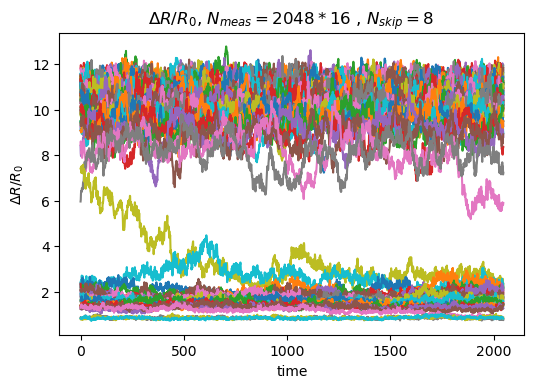

In [12]:
# l = 2
Tdata = []
PSD = []
Omega = []
fs = 1000.0
beta = 10.0
window_length = 1024
numoverlap = 900
kaiserw = signal.get_window(('kaiser', beta), window_length) # Kaiser window
boxcarw = signal.boxcar(window_length)

for i in range(nn):
    tdata = np.loadtxt(path + "t_data_" + str(i) + ".dat") ## Loading data of R(t) time series for each electric field 
    R0 = np.mean(tdata)   ## Finding the mean of R(t) = R_0
    ndata = np.size(tdata)  ## size of time series, ndata = 2048*16
    delR = (tdata - R0*np.ones(ndata))  ## delR(t) = R(t) - R_0
#     fval, R_ps = (signal.welch((delR/R0), fs, nperseg = window_length, window=kaiserw, noverlap = numoverlap)) ## PSD using welch method
    fval, R_ps = np.absolute(signal.welch((delR/R0), fs, nperseg = window_length, window=boxcarw, noverlap = numoverlap)) ## PSD using welch method
#     fval,R_ps = signal.welch((delR/R0),fs,window='hann',nperseg=window_length, noverlap = numoverlap)
    Tdata.append(tdata) 
    PSD.append(R_ps/R0**2)
    Omega.append(fval)
#     if E_up[i] == 22.2 :# and E_up[i] < 24.0:
#     plt.plot((delR/R0) , label = "E = " + format(E_up[i], '.2f') )
    plt.plot(tdata, label = "E = " + format(Vt_up1[i], '.2f') ) 
#     if Vt_up1[i] == 100.0 :
# #         plt.plot((delR/R0) , label = "E = " + format(E_up[i], '.2f') )
#         plt.plot(tdata, label = "E = " + format(E_up[i], '.2f') )
#     elif Es_up1[i] == 1.2 :
# #         plt.plot((delR/R0) , label = "E = " + format(E_up[i], '.2f') )
#         plt.plot(tdata, label = "E = " + format(E_up[i], '.2f') )
#     elif Es_up1[i] == 1.4 :
# #         plt.plot((delR/R0) , label = "E = " + format(E_up[i], '.2f') )
#         plt.plot(tdata, label = "E = " + format(E_up[i], '.2f') )
#     elif Es_up1[i] == 1.3 :
# #         plt.plot((delR/R0) , label = "E = " + format(E_up[i], '.2f') )
#         plt.plot(tdata, label = "E = " + format(E_up[i], '.2f') )
#     else: 
#         None
        

Tdata = np.array(Tdata)
PSD = np.array(PSD)
Omega = np.array(Omega)
# print(Omega[1,:])
print(np.shape(Tdata) , np.shape(PSD) , np.shape(Omega))
# plt.xlim(2049,5096)
plt.xlabel("time")
plt.ylabel("$\Delta R$/$R_0$")
# plt.ylabel("R")
# plt.ylim(-1.,1.)
# plt.legend()
plt.title( r'$\Delta R/R_0$' + ", $N_{meas} = 2048*16$ , $N_{skip} = 8$ ")
# # plt.savefig(path+"Rvt.pdf")
plt.show()

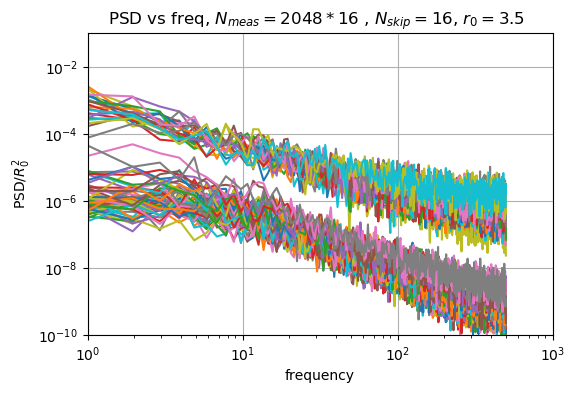

In [13]:
# PSD_n = np.zeros(np.shape(PSD))
# for i in range(nn):
#     PSD_n[i,:] = (PSD[i,:]/((Alldata[i,7])**2))

for i in range(nn):
#     if E_up[i] < 25.0:
    plt.loglog(Omega[i,1:], PSD[i,1:], label = "E = " + format(Vt_up1[i], '.2f') )

    
PSD_snap = PSD[:,Omega[1,:] == 100.5859375] 
# print(PSD_snap)
plt.title("PSD vs freq, $N_{meas} = 2048*16$ , $N_{skip} = 16$, $r_0 = 3.5$  ")
# plt.ylabel("$PSD^2$/$R^2$")
plt.ylabel("PSD/$R_0^2$" )
plt.xlabel("frequency")
plt.xlim(1,1000)
# plt.legend()
plt.ylim(1.0E-10,1.0E-1)
plt.grid(b=True,which='major', axis='both')
# plt.savefig(path+"PSDvf_16_wb.pdf")
plt.show()

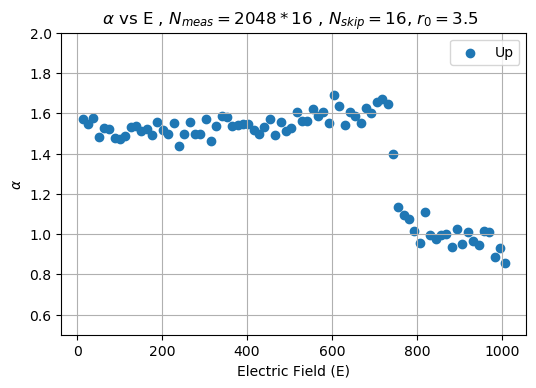

In [14]:
alpha_up = []
alpha_dn = []
# for i in range(nn):
#     if E_up[i] < 22.0:
#         cut_off_freq = 0.01
#         Omega_red = Omega[i,Omega[i,:] > cut_off_freq]
#         data_trunc = np.shape(Omega_red)[0] 
#         data_pts = np.shape(Omega)[1]
#         lg_Omega = np.log(Omega_red)
#         lg_PSD = np.log(PSD[i,data_pts - data_trunc:])
#         p = np.polyfit(lg_Omega[:], lg_PSD[:], deg = 1)
#     else: 
#         cut_off_freq = 10.
#         Omega_red = Omega[i,Omega[i,:] > cut_off_freq]
#         data_trunc = np.shape(Omega_red)[0] 
#         data_pts = np.shape(Omega)[1]
#         lg_Omega = np.log(Omega_red)
#         lg_PSD = np.log(PSD[i,data_pts - data_trunc:])
#         p = np.polyfit(lg_Omega[:], lg_PSD[:], deg = 1)
#     alpha_up.append(-p[0])

for i in range(nn):
    lg_Omega = np.log(Omega[i,1:])
    lg_PSD = np.log(PSD[i,1:])
#     p = np.polyfit(lg_Omega, lg_PSD, deg = 1)
    slope, intercept, r_value, p_value, std_err = stats.linregress(lg_Omega, lg_PSD)
    alpha_up.append(-slope)

alpha_up = np.array(alpha_up)
alpha_dn = np.array(alpha_dn)
# print(np.shape(alpha_up), np.shape(alpha_dn))
# np.savetxt(path + "A_m1_02.dat", alpha_up)

# plt.plot(E_up,alpha_up,label="Up")
plt.scatter(Vt_up1,alpha_up,label="Up")
# plt.scatter(E_dn_py,alpha_dn, c = "RoyalBlue", label="Down")
plt.title(r'$\alpha$' + " vs E , $N_{meas} = 2048*16$ , $N_{skip} = 16$, $r_0 = 3.5$  ")
plt.legend()
# plt.savefig(path+"alpvf.pdf")
# plt.xlim(20.0,30.0)
plt.ylim(0.5,2.0)
plt.xlabel("Electric Field (E)")
plt.ylabel(r'$\alpha$')
plt.grid(b=True,which='major', axis='both')
plt.show()
    



In [15]:

# rows = 8
# columns = 4
# fig=plt.figure(figsize=(40, 40))
# E = 19.
# for i in range(32):
# #     if i%16 == 0:  
#     globals()["phi_" + str(i)] = np.loadtxt(path + "phi_val_"+ format(E, '.2f')+ "_" +str(i)+".dat")
#     fig.add_subplot(rows, columns, (i+1))
#     plt.imshow(np.transpose((globals()["phi_" + str(i)])**2),cmap='rainbow',vmin=0.0,vmax=1.0)
#     plt.title("E = "+format(E, '.2f'))
# #     plt.xlabel("m_x")
# #     plt.ylabel("m_y")
# # plt.legend()    

# plt.show()



## Power Spectrum Distribution : method 2 
In this part we perform the PSD calculations and then concatenate the PSDs. 

In [16]:
# NP = 16
# nmeas = 2048
# Tdata = []
# PSD2 = []
# Omega = []
# fs = 1000.0
# kk = 10
# for i in range(nn):
#     tdata = np.loadtxt(path + "t_data_" + str(i) + ".dat")
#     tdata = tdata.reshape((NP,nmeas))
#     R0 = np.mean(tdata,axis=1)
#     R0 = R0.reshape((NP,1))
#     R0 = np.dot(R0,np.ones((1,nmeas)))
# #     print(R0)
#     delR = tdata - R0
#     fval, R_ps = signal.welch((delR/R0)**2,fs, window=kaiser)
#     Tdata.append(tdata)
#     PSD2.append(R_ps)
#     Omega.append(fval)
#     plt.plot(delR[0,:]/R0[0,:] , label = "E = " + format(E_up[i], '.2f') )
#     plt.plot(tdata[kk,:], label = "E = " + format(E_up[i], '.2f') )


    
# Tdata = np.array(Tdata)
# PSD2 = np.array(PSD2)
# Omega = np.array(Omega)
# print(np.shape(Tdata) , np.shape(PSD2) , np.shape(Omega))
# plt.xlabel("Time")
# plt.ylabel(r'$\frac{\Delta R}{\langle R \rangle}$', fontsize = 16)
# # plt.ylabel("R")
# # # plt.ylim(0,10)
# # plt.legend()
# plt.title("R vs t, $N_{meas} = 2048$ , $m_x = m_y = 64$  ")
# # # plt.savefig(path+"Rvt.pdf")
# plt.show()

In [17]:
# PSD_av = np.mean(PSD2,axis=1)
# print(np.shape(PSD2) , np.shape(PSD_av))

# for i in range(nn):
#     PSD_av[i,:] = PSD_av[i,:]/Alldata[i,7]

# for i in range(nn):
# #     plt.loglog(Omega[i,:], PSD_n[i,:], label = "E = " + format(E_up[i], '.2f') ,linestyle='dashed' )
#     plt.loglog(Omega[i,:], PSD_av[i,:], label = "E = " + format(E_up[i], '.2f') )


# #     plt.loglog(Omega[i,:], PSD[i,:])

# plt.title("PSD vs freq, $N_{meas} = 2048*16$ , $64*64$, $f_{samp}$ ="+ format(fs, '.1f') + ", $r_0 = 3.5$  ")
# plt.ylabel("PSD/$R^2$")
# plt.xlabel("frequency")
# # plt.xlim(10,100)
# # plt.savefig(path+"PSDvf.pdf")
# plt.grid(b=True,which='major', axis='both')
# # plt.legend()
# plt.show()

In [18]:
# alpha_up = []
# alpha_dn = []
# for i in range(nn):
#     if E_up[i] < 23.0:
#         cut_off_freq = 10
#         Omega_red = Omega[i,Omega[i,:] > cut_off_freq]
#         data_trunc = np.shape(Omega_red)[0] 
#         data_pts = np.shape(Omega)[1]
#         lg_Omega = np.log(Omega_red)
#         lg_PSD = np.log(PSD_n[i,data_pts - data_trunc:])
#         p = np.polyfit(lg_Omega[:], lg_PSD[:], deg = 1)
#     else: 
#         cut_off_freq = 100
#         Omega_red = Omega[i,Omega[i,:] > cut_off_freq]
#         data_trunc = np.shape(Omega_red)[0] 
#         data_pts = np.shape(Omega)[1]
#         lg_Omega = np.log(Omega_red)
#         lg_PSD = np.log(PSD_n[i,data_pts - data_trunc:])
#         p = np.polyfit(lg_Omega[:], lg_PSD[:], deg = 1)
#     alpha_up.append(-p[0])

    
# alpha_up = np.array(alpha_up)
# alpha_dn = np.array(alpha_dn)
# # print(np.shape(alpha_up), np.shape(alpha_dn))
# # np.savetxt(path + "A_m2_8.dat", alpha_up)

# # plt.plot(E_up,alpha_up,label="Up")
# plt.scatter(E_up,alpha_up,label="Up")
# # plt.scatter(E_dn_py,alpha_dn, c = "RoyalBlue", label="Down")
# plt.title("alpha vs V , $N_{meas} = 2048*16$ , $64*64$, $f_{samp}$ ="+ format(fs, '.1f') + ", $r_0 = 3.5$  ")
# plt.legend()
# # plt.savefig(path+"alpvf.pdf")
# plt.xlabel("Electric Field (E)")
# plt.ylabel(r'$\alpha$')
# plt.grid(b=True,which='major', axis='both')
# plt.show()
    